In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info())
print(df.isnull().sum())
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


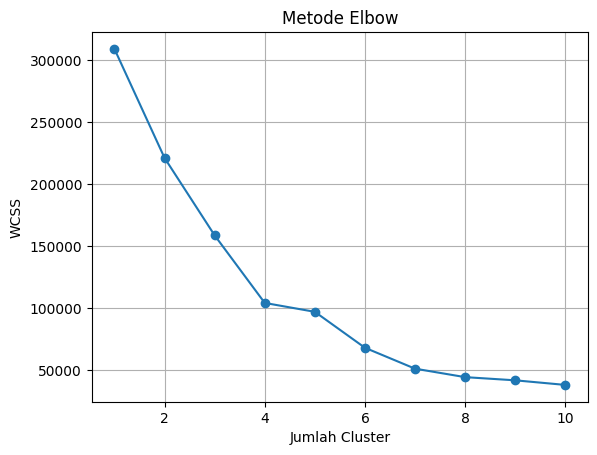

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()


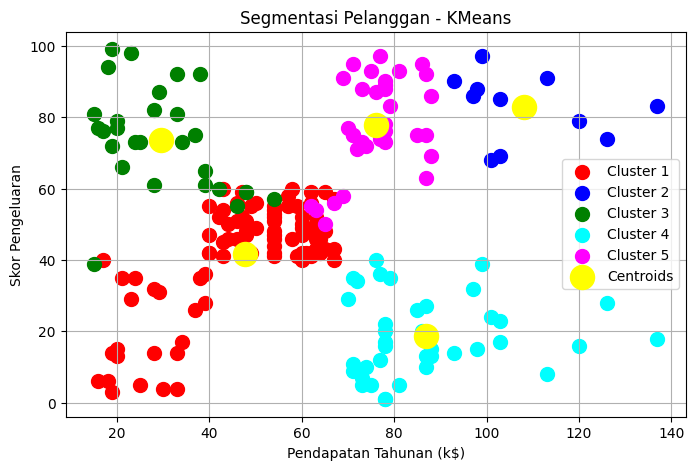

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[y_kmeans==0, 1], X.iloc[y_kmeans==0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans==1, 1], X.iloc[y_kmeans==1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans==2, 1], X.iloc[y_kmeans==2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans==3, 1], X.iloc[y_kmeans==3, 2], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans==4, 1], X.iloc[y_kmeans==4, 2], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=300, c='yellow', label='Centroids')
plt.title('Segmentasi Pelanggan - KMeans')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran')
plt.legend()
plt.grid()
plt.show()
